In [1]:
import os
import pickle
import sys

import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Get the current working directory
CURRENT_DIR = os.getcwd()

# Set the root directory to the parent of the current directory
ROOT = os.path.abspath(os.path.join(CURRENT_DIR, os.pardir))
sys.path.insert(0, ROOT)

from notebooks.plotting_tools import *
from code_.model_configs import analysis_cfg
from code_.model_activations.models.utils import load_full_identifier
from plotting_tools import *

load_dotenv()
CACHE = os.getenv("CACHE")
RESULTS_PATH = os.path.join(ROOT,'results')

In [2]:
MULTIPLIER = 36

def load_and_prepare_data(model_name, multiplier, dataset, region):
    filepath = os.path.join(RESULTS_PATH, model_name + '_' + dataset + '_' + region + '.pkl')
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
    df['model'] = model_name
    df['features'] = df['features'].apply(lambda x: int(x) * multiplier)
    df['score'] = df['score'].astype(np.float32)
    return df

In [3]:
DATASET = 'naturalscenes' # one of ['majajhong', 'naturalscenes']
region = analysis_cfg[DATASET]['regions']

In [4]:
# loading linear model data
df = load_and_prepare_data('init_types', MULTIPLIER, DATASET, region)

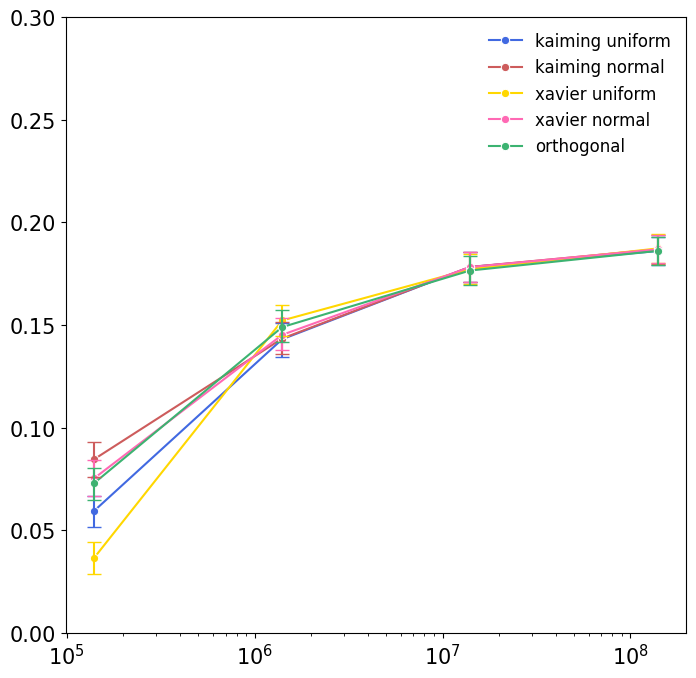

In [6]:
palette = {         
    'kaiming uniform':'royalblue',
    'kaiming normal':'indianred',
    'xavier uniform':'gold',
    'orthogonal':'mediumseagreen',
    'xavier normal':'hotpink'
}
df['features'] = df['features'].apply(lambda x: int(x)*36)
df['init_type'] = df['init_type'].apply(lambda x: x.replace('_',' '))
df['color'] = df['init_type'].map(palette)


rcParams['figure.figsize'] = (8,8)  

# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='init_type', marker='o',palette = palette)

# adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], 
                       [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])
plt.xlabel('')
plt.ylabel('')
plt.ylim(0,0.65) if region == 'IT' else plt.ylim(0,0.3)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")    
ax1.legend(frameon=False,fontsize=12)
plt.savefig(os.path.join(ROOT, f'figures/figure_s3_{DATASET}_{region}.png'), dpi=200) 
plt.show()